In [2]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import astropy.units as units
import pandas as pd

In [3]:
kic = '8006161'
numax = [3575.0, 57.0]
dnu = [149.4, 1.3]
teff = [5488, 77]
bp_rp = [1.34, 0.1]

In [4]:
import lightkurve as lk
lcs = lk.search_lightcurvefile(kic, cadence='short').download_all()
lcs = lcs[1:9]

In [5]:
lc = lcs[1].PDCSAP_FLUX.remove_nans().remove_outliers().normalize().flatten()
for l in lcs[2:]:
    lc = lc.append(l.PDCSAP_FLUX.remove_nans().remove_outliers().normalize().flatten())
lc = lc.remove_outliers(5)

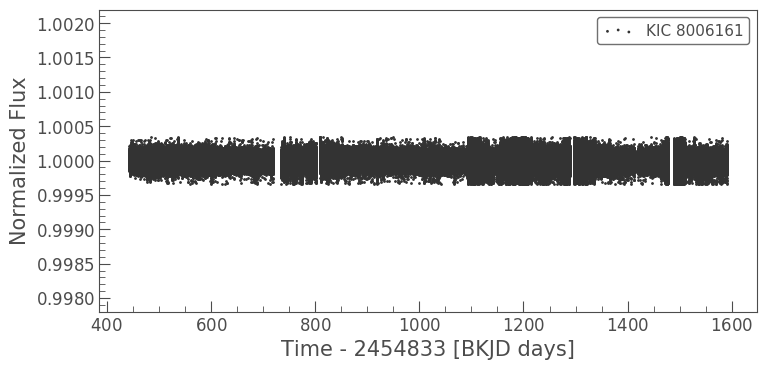

In [6]:
lc.scatter();

In [7]:
jam_sess = session(ID = kic, numax = numax, dnu = dnu, teff = teff, bp_rp = bp_rp, 
                   nthreads=4, timeseries=lc, store_chains = True, cadence=['short'])

In [10]:
# Result is always a list of star class instances
# Taking the first one as an example
star = jam_sess.stars[0]
import pbjam.asy_peakbag

In [26]:
ekde = pbjam.epsilon(nthreads=4)
eps_guess = ekde(dnu=dnu, numax=numax, teff=teff)

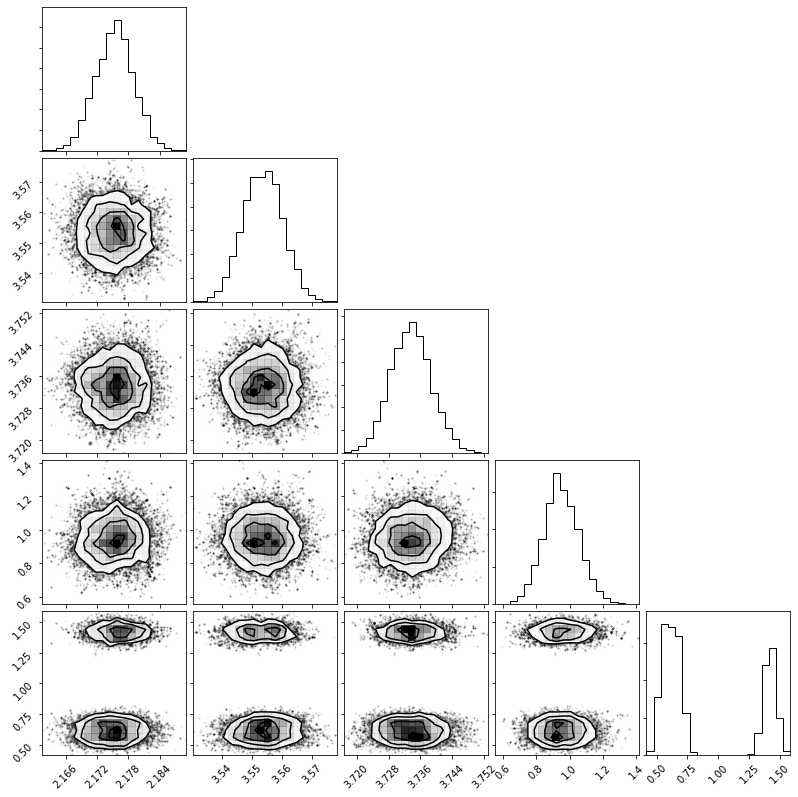

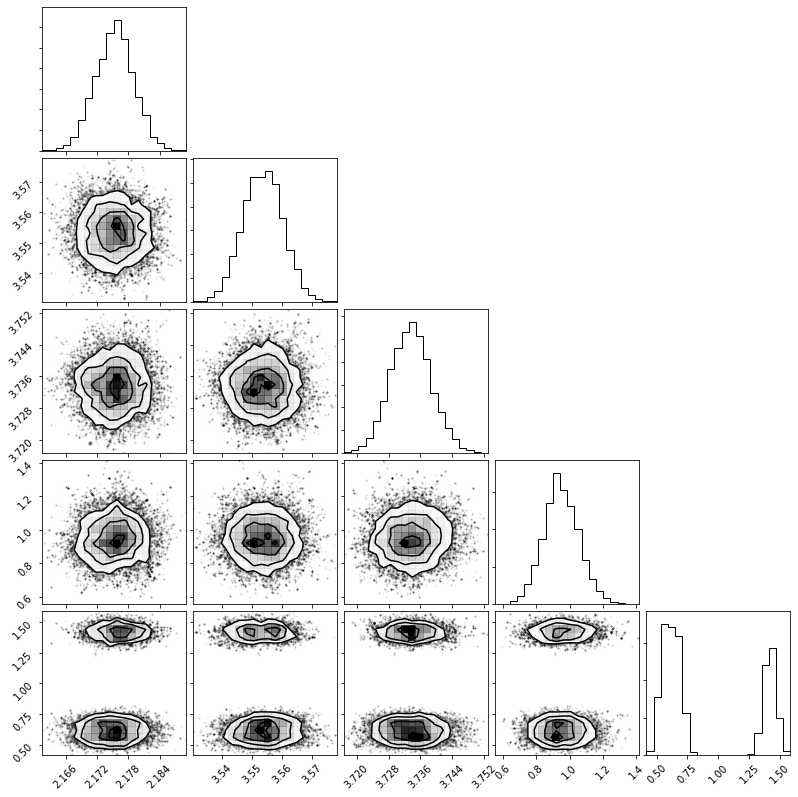

In [27]:
import corner as corner
corner.corner(ekde.samples);

In [39]:
import importlib
importlib.reload(pbjam.asy_peakbag)

<module 'pbjam.asy_peakbag' from '/home/davies/Code/PBjam/pbjam/asy_peakbag.py'>

In [40]:
fit = pbjam.asy_peakbag.asymptotic_fit(star, norders=10, nthreads=4)

In [41]:
print(fit.guess)

OrderedDict([('numax', array([3575.0, 57.0], dtype=object)), ('dnu', array([149.4, 1.3], dtype=object)), ('eps', [1.012862419616268, 0.4020441614049038]), ('alpha', [0.01]), ('d02', [20.916000000000004]), ('env_height', [1]), ('env_width', [2.946426856142516]), ('mode_width', [-0.4982936060787344]), ('teff', array([5488, 77], dtype=object)), ('bp_rp', array([1.34, 0.1], dtype=object))])


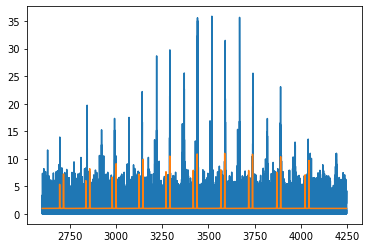

In [42]:
start = [v[0] for k, v in fit.guess.items()]
fit.model(start)

fig, ax = plt.subplots()
ax.plot(fit.f[fit.sel], fit.s[fit.sel])
ax.plot(fit.f[fit.sel], fit.model(start))

In [43]:
fit.run(burnin=200, niter=200)

,ell,nu_med,nu_mad
0,2,2696.510356,2.691122
1,0,2721.043341,2.261347
2,2,2837.488023,2.956110
3,0,2861.987982,1.578052
4,2,2980.354978,3.305162
5,0,3004.429173,1.028372
6,2,3124.780939,3.429973
7,0,3148.413976,0.584027
8,2,3270.660071,3.562795
9,0,3293.963400,0.297478


In [44]:
star.asy_result = fit

/home/davies/.local/lib/python3.6/site-packages/IPython/core/events.py:73: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/davies/.local/lib/python3.6/site-packages/IPython/core/events.py:73: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/davies/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/davies/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/davies/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/davie

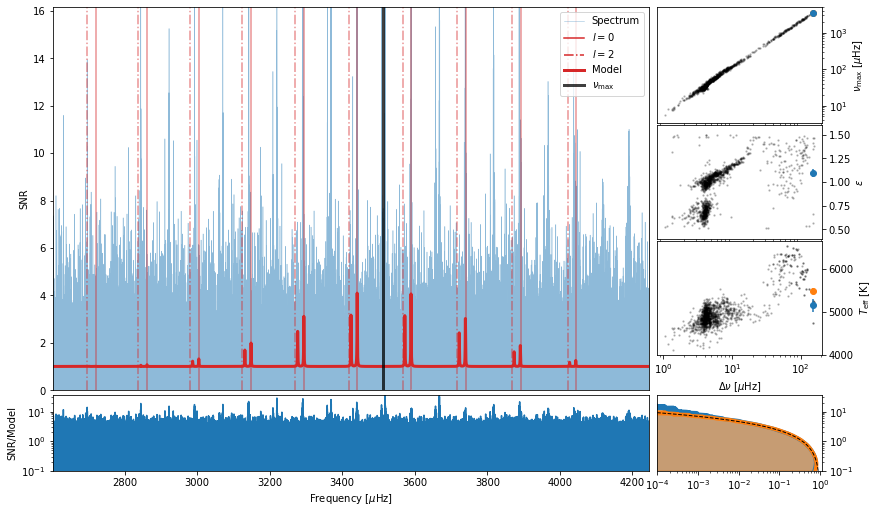

In [45]:
star.plot_asyfit();

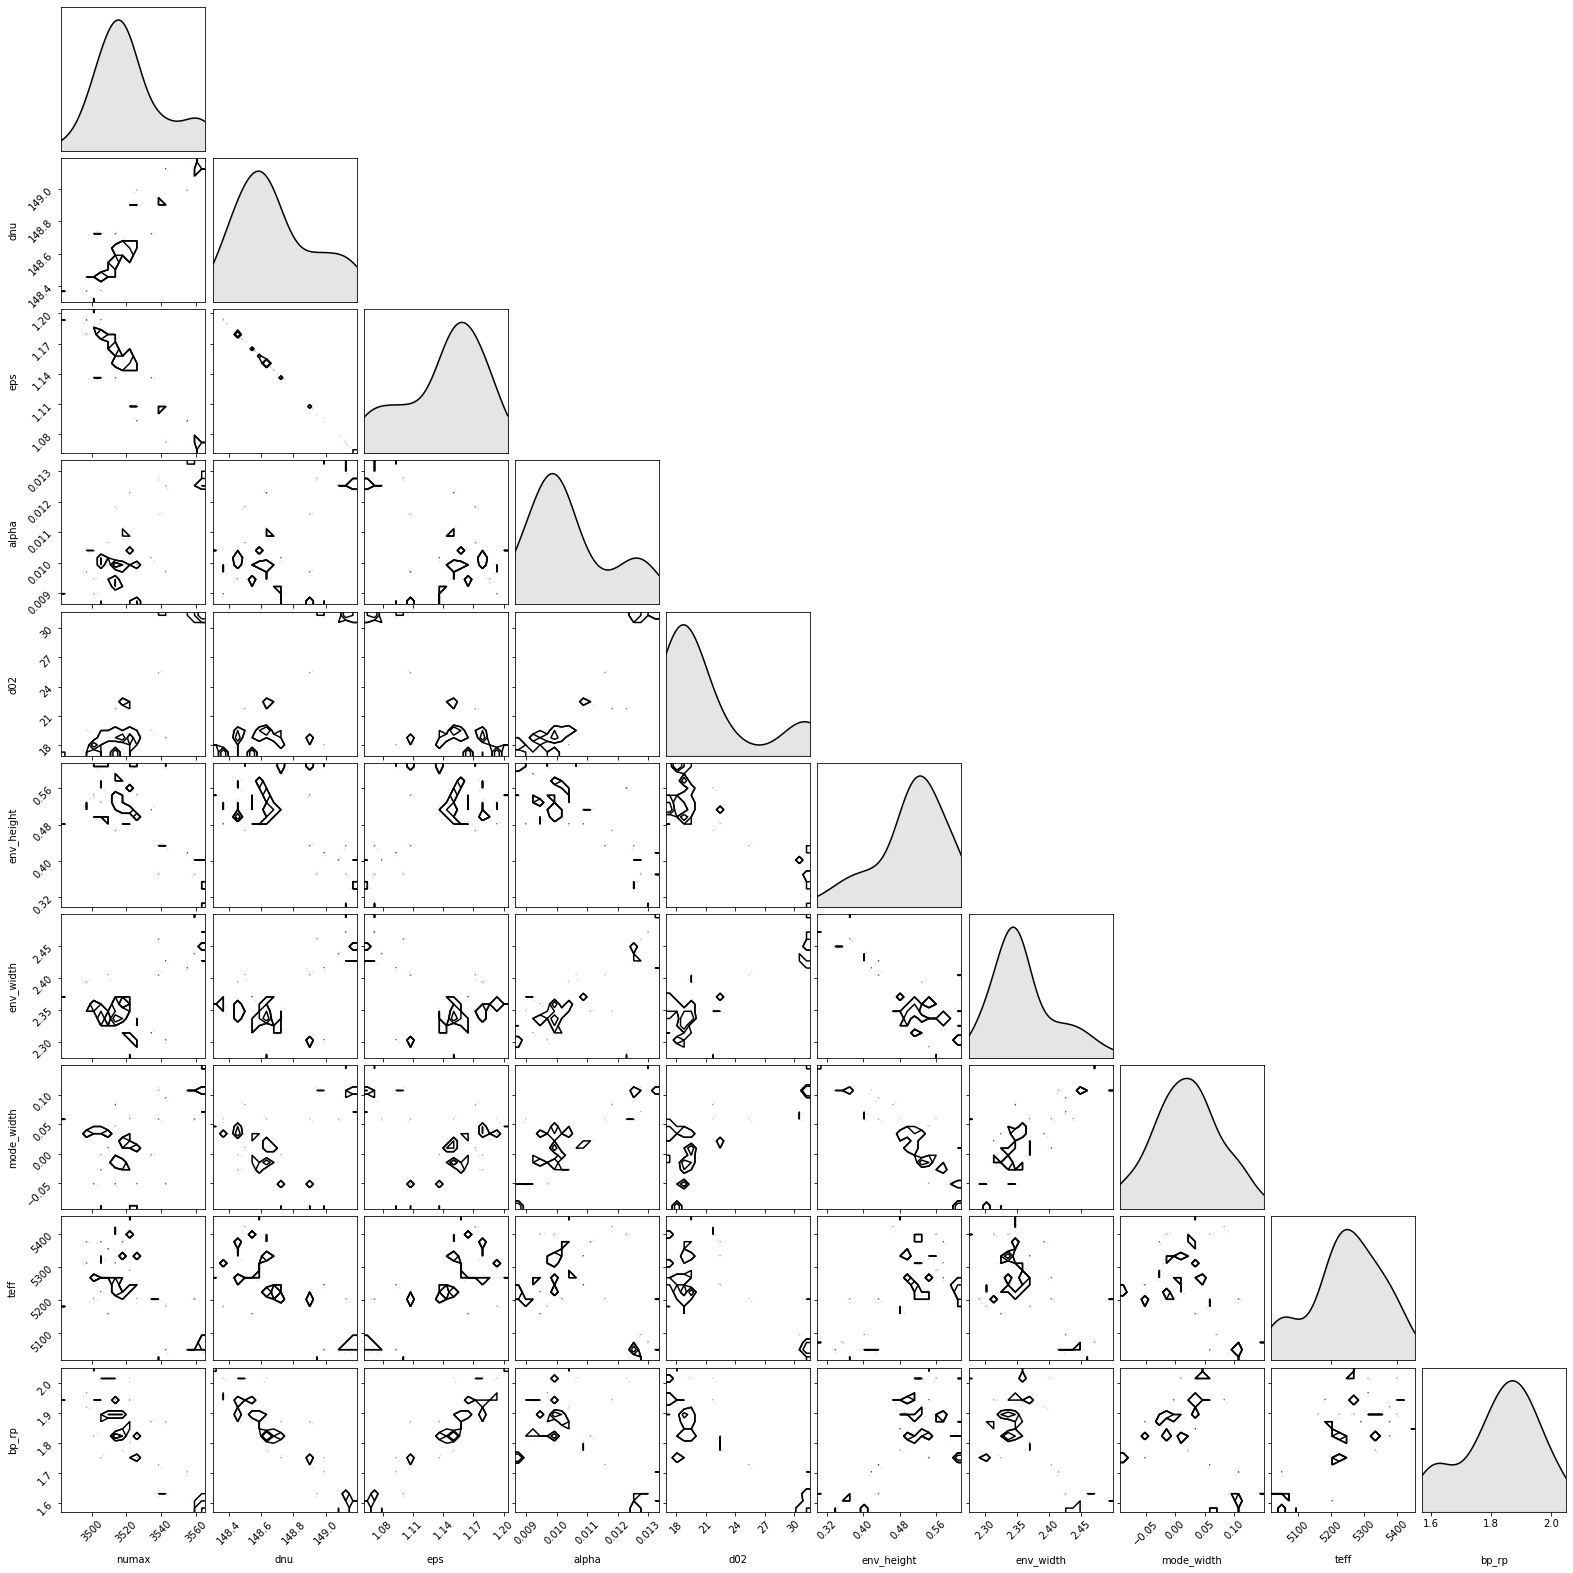

In [47]:
star.corner();